In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout, Activation
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
folder_path = "/content/drive/MyDrive/Train"
filenames = []
categories = []

for category in os.listdir(folder_path):
    category_path = os.path.join(folder_path, category)

    if os.path.isdir(category_path):
        for filename in os.listdir(category_path):
            filenames.append(os.path.join(category, filename))
            categories.append(category)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [ ]:
df.head()

,filename,category
0,Normal/Normal- (2170).jpg,Normal
1,Normal/Normal- (2168).jpg,Normal
2,Normal/Normal- (2141).jpg,Normal
3,Normal/Normal- (2124).jpg,Normal
4,Normal/Normal- (2149).jpg,Normal


In [ ]:
df.tail()

,filename,category
2995,Stone/Stone- (981).jpg,Stone
2996,Stone/Stone- (971).jpg,Stone
2997,Stone/Stone- (976).jpg,Stone
2998,Stone/Stone- (990).jpg,Stone
2999,Stone/Stone- (984).jpg,Stone


<Axes: xlabel='category'>

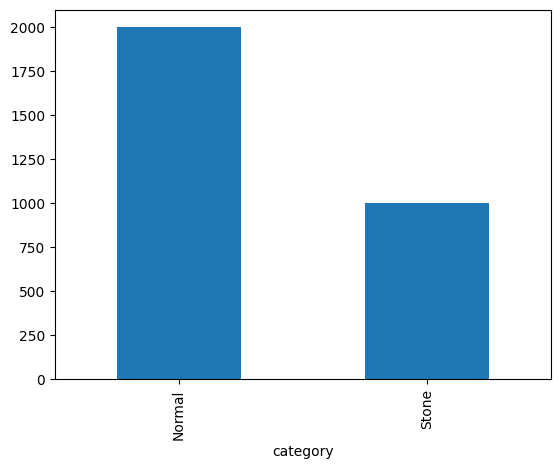

In [ ]:
df['category'].value_counts().plot.bar()

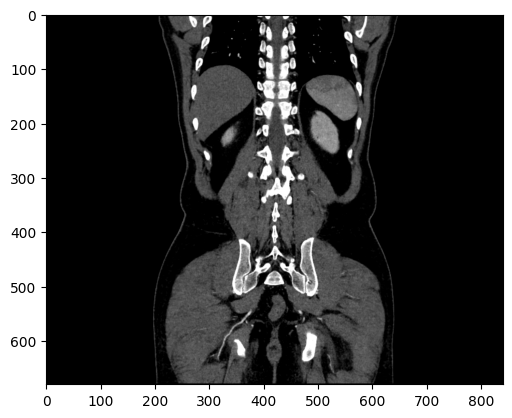

In [ ]:
import random
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.utils import load_img
sample = random.choice(filenames)
image = load_img("/content/drive/MyDrive/Train/"+sample)
plt.imshow(image)

In [ ]:
image_size = (150, 150)

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
model = Sequential()

In [ ]:
 model.add(base_model)

In [ ]:
model.add(tf.keras.layers.GlobalAveragePooling2D())

In [ ]:
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


In [ ]:
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 5, 5, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,850,625 (90.98 MB)

 Trainable params: 262,657 (1.00 MB)

 Non-trainable params: 23,587,968 (89.98 MB)

In [ ]:
import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import cv2
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
earlystop = EarlyStopping(patience=10)

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [ ]:
callbacks = [earlystop, learning_rate_reduction]

In [ ]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

<Axes: xlabel='category'>

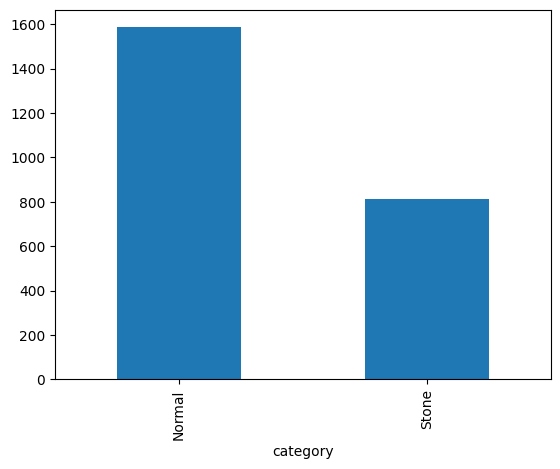

In [ ]:
train_df['category'].value_counts().plot.bar()

<Axes: xlabel='category'>

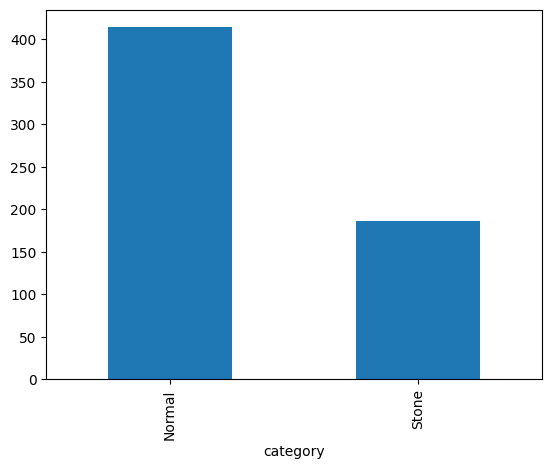

In [ ]:
validate_df['category'].value_counts().plot.bar()

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "/content/drive/MyDrive/Train",
    x_col='filename',
    y_col='category',
    target_size=(150,150),
    class_mode='binary',
    batch_size=15
)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "/content/drive/MyDrive/Train",
    x_col='filename',
    y_col='category',
    target_size=(150,150),
    class_mode='binary',
    batch_size=15
)

Found 2400 validated image filenames belonging to 2 classes.
Found 600 validated image filenames belonging to 2 classes.


In [ ]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    "/content/drive/MyDrive/Train",
    x_col='filename',
    y_col='category',
    target_size=(150,150),
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


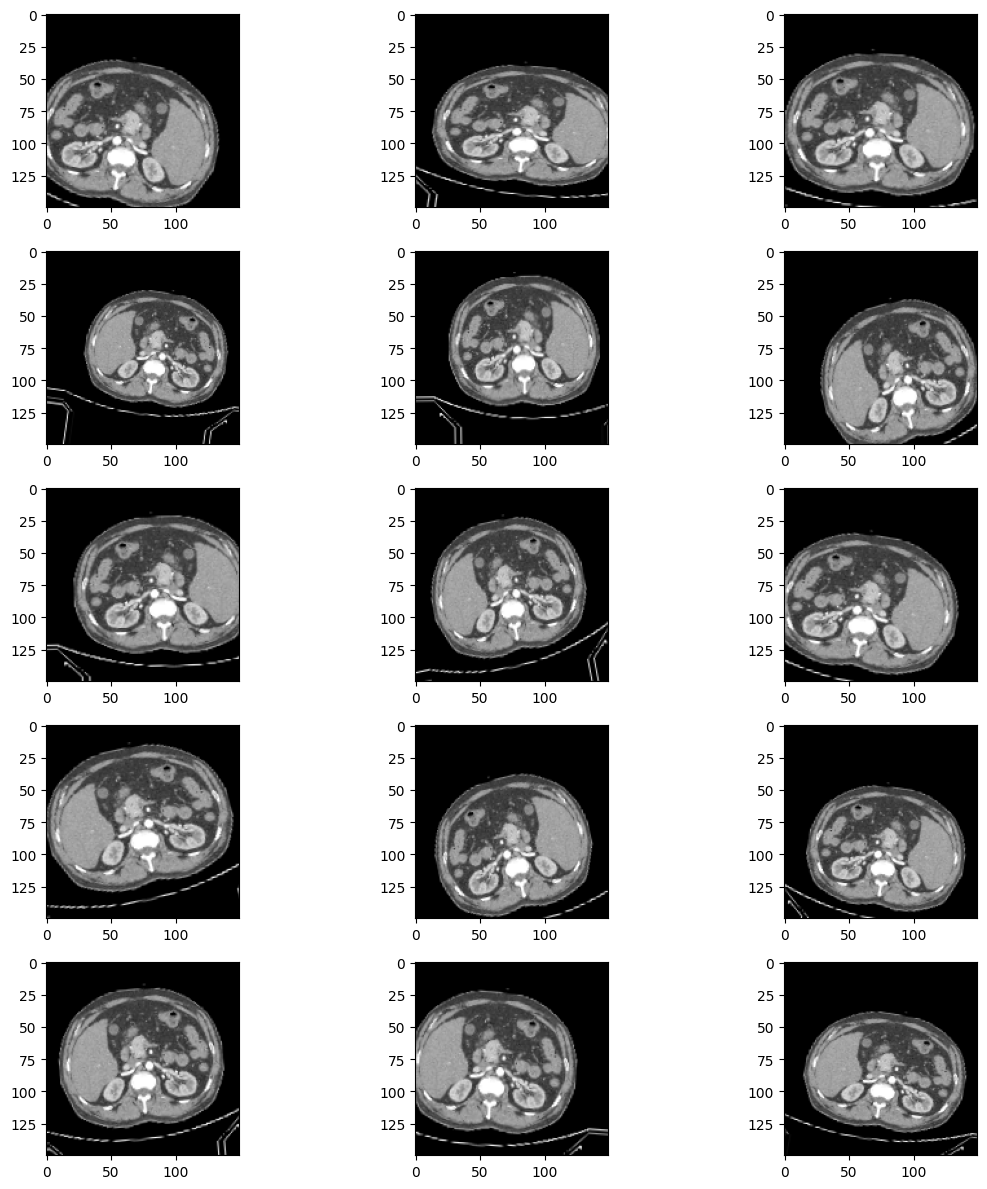

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validate_df.shape[0]//15,
    steps_per_epoch=train_df.shape[0]//15,
    callbacks=callbacks
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 1100s 7s/step - accuracy: 0.6486 - loss: 0.6158 - val_accuracy: 0.6900 - val_loss: 0.6824 - learning_rate: 0.0010
Epoch 2/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 305s 2s/step - accuracy: 0.7889 - loss: 0.4416 - val_accuracy: 0.6933 - val_loss: 0.8244 - learning_rate: 0.0010
Epoch 3/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 291s 2s/step - accuracy: 0.8179 - loss: 0.4101 - val_accuracy: 0.7000 - val_loss: 1.2672 - learning_rate: 0.0010
Epoch 4/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - accuracy: 0.8177 - loss: 0.4004 - val_accuracy: 0.7433 - val_loss: 0.8233 - learning_rate: 0.0010
Epoch 5/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 317s 2s/step - accuracy: 0.8200 - loss: 0.4082 - val_accuracy: 0.7300 - val_loss: 1.4029 - learning_rate: 0.0010
Epoch 6/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8388 - loss: 0.3603
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
160/160 ━━━━━━━━━━━━━━━━━━━━ 277s 2s/step - accuracy: 0.8388 - loss: 0.36

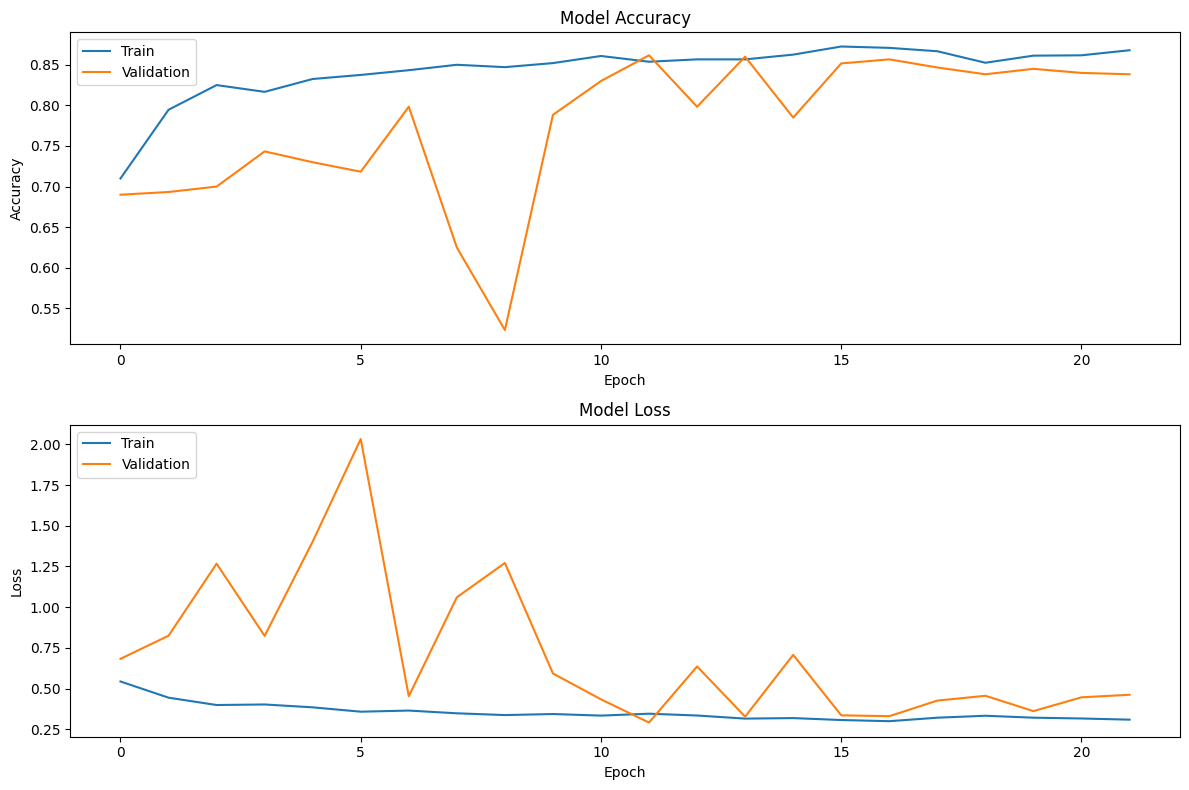

In [ ]:
# Plotting the training history
plt.figure(figsize=(12, 8))

# Plot training & validation accuracy values
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second subplot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
model.save('kidney_stone_detection_model.h5')

In [ ]:
test_folder_path = "/content/drive/MyDrive/Test"
test_filenames = []
test_categories = []

for category in os.listdir(test_folder_path):
    test_category_path = os.path.join(test_folder_path, category)

    if os.path.isdir(test_category_path):
        for filename in os.listdir(test_category_path):
            test_filenames.append(os.path.join(category, filename))
            test_categories.append(category)

test_df = pd.DataFrame({
    'filename': test_filenames,
    'category': test_categories
})

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_gen.flow_from_dataframe(
    test_df,
    "/content/drive/MyDrive/Test",
    x_col='filename',
    y_col='category',
    target_size=(150,150),
    class_mode='categorical',
    batch_size=15,
    shuffle=False
)

Found 623 validated image filenames belonging to 2 classes.


In [ ]:
steps = int(np.ceil(test_df.shape[0] / 15))  # Ensure steps is an integer

predict = model.predict(test_generator, steps=steps)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step


In [ ]:
test_df['predicted category'] = np.argmax(predict, axis=-1)

In [ ]:
test_df['predicted category'] = test_df['predicted category'].replace({ 1: 'Stone', 0: 'Normal' })

In [ ]:
test_df.head()

,filename,category,predicted category
0,Normal/Normal- (1278).jpg,Normal,Normal
1,Normal/Normal- (1288).jpg,Normal,Normal
2,Normal/Normal- (2310).jpg,Normal,Normal
3,Normal/Normal- (1299).jpg,Normal,Normal
4,Normal/Normal- (1283).jpg,Normal,Normal


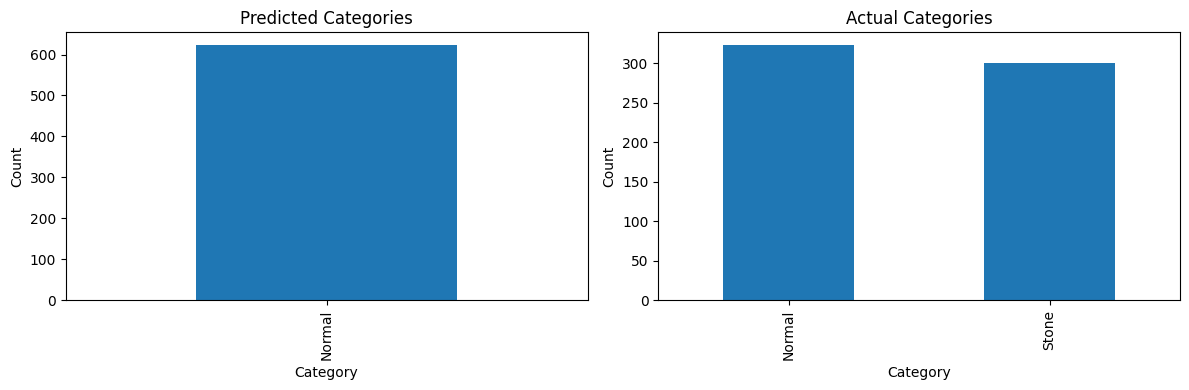

In [ ]:
plt.figure(figsize=(12, 4))

# Plot the first bar plot (predicted category)
plt.subplot(1, 2, 1)
test_df['predicted category'].value_counts().plot.bar()
plt.title('Predicted Categories')
plt.xlabel('Category')
plt.ylabel('Count')

# Plot the second bar plot (actual category)
plt.subplot(1, 2, 2)
test_df['category'].value_counts().plot.bar()
plt.title('Actual Categories')
plt.xlabel('Category')
plt.ylabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

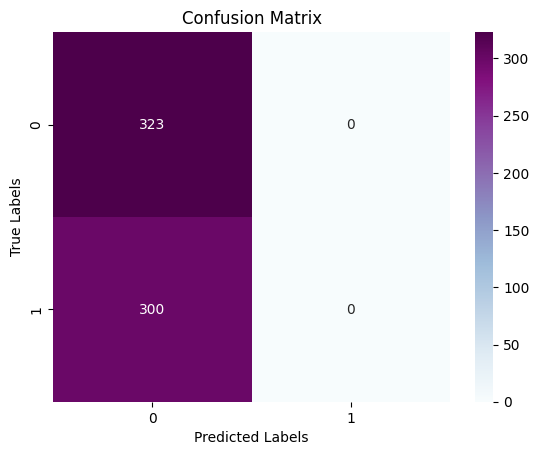

In [ ]:
cm = confusion_matrix(test_df['category'], test_df['predicted category'])

sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [ ]:
print("Number of batches:", len(test_generator))


Number of batches: 42


In [ ]:
batch_images, batch_labels = next(iter(test_generator))
print(f"Batch image shape: {batch_images.shape}")  # Expected: (batch_size, height, width, channels)
print(f"Batch label shape: {batch_labels.shape}")  # Expected: (batch_size,) or (batch_size, num_classes)


Batch image shape: (15, 150, 150, 3)
Batch label shape: (15, 2)


In [ ]:
if "model" in globals():
    print("✅ Model is defined.")
else:
    print("❌ Model is NOT defined. Re-run training or load the model.")


✅ Model is defined.


In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_gen.flow_from_dataframe(
    test_df,
    "/content/drive/MyDrive/Test",
    x_col='filename',
    y_col='category',
    target_size=(150,150),
    class_mode='binary',  # Change to 'binary'
    batch_size=15,
    shuffle=False
)


Found 623 validated image filenames belonging to 2 classes.


In [ ]:
model.evaluate(test_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9198 - loss: 0.2084


[0.49822983145713806, 0.7833065986633301]

In [ ]:
# Save the model for future use
model.save('kidney_stone_detection_model.h5')


In [ ]:
from google.colab import files
files.download("kidney_stone_detection_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>